 
# Linear Regression  

***
* Regression Models
    * Linear, Logistic
* Prediction using linear regression
* Some re-sampling methods    
    * Train-Test splits
    * Cross Validation

Linear regression is used to model and predict continuous outcomes while logistic regression is used to model binary outcomes.  


The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams


/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


***
Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset $X$ and $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $X_i$ without a $Y$ value.  </li>
  <li> Model the <b>strength of the relationship</b> between each dependent variable $X_i$ and $Y$</li>
    <ul>
      <li> Sometimes not all $X_i$ will have a relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to determine $Y$ </li>
    </ul>
   <li>Linear regression is used in so many applications. It is in many cases, this is  first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A brief recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is linearly related to the dependent variable $Y$.  

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. This is the simplest form of linear regression (one variable), we'll call this the simple model. 

* $\beta_0$ is the intercept of the linear model

* Multiple linear regression is when you have more than one independent variable
    * $X_1$, $X_2$, $X_3$, $\ldots$

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once you estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, you can use these to predict new values of $Y$

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is one of the most common methods
   
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the difference between the following: 

$$ S = \sum_{i=1}^N r_i = \sum_{i=1}^N (y_i - (\beta_0 + \beta_1 x_i))^2 $$

where $N$ is the number of observations.  

* We will not go into the mathematical details, but the least squares estimates $\hat{\beta}_0$ and $\hat{\beta}_1$ minimize the sum of the squared residuals $r_i = y_i - (\beta_0 + \beta_1 x_i)$ in the model (i.e. makes the difference between the observed $y_i$ and linear model $\beta_0 + \beta_1 x_i$ as small as possible). 

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

**Note**: The "hat" means it is an estimate of the coefficient.  

***
# Part 2: Boston Housing Data Set

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

# PART 3 : DATA CLEANING NOT COVERED TODAY
Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a good fit could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:

16 data points have an 'MEDV' value of 50.0. These data points likely contain missing or censored values and have been removed.
1 data point has an 'RM' value of 8.78. This data point can be considered an outlier and has been removed.
The features 'RM', 'LSTAT', 'PTRATIO', and 'MEDV' are essential. The remaining non-relevant features have been excluded.
The feature 'MEDV' has been multiplicatively scaled to account for 35 years of market inflation.
Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [16]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [17]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [18]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [19]:
bos['PRICE'] = boston.target*1000
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24000.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21600.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34700.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33400.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36200.0


In [11]:
bos.PRICE

0      24000.0
1      21600.0
2      34700.0
3      33400.0
4      36200.0
5      28700.0
6      22900.0
7      27100.0
8      16500.0
9      18900.0
10     15000.0
11     18900.0
12     21700.0
13     20400.0
14     18200.0
15     19900.0
16     23100.0
17     17500.0
18     20200.0
19     18200.0
20     13600.0
21     19600.0
22     15200.0
23     14500.0
24     15600.0
25     13900.0
26     16600.0
27     14800.0
28     18400.0
29     21000.0
        ...   
476    16700.0
477    12000.0
478    14600.0
479    21400.0
480    23000.0
481    23700.0
482    25000.0
483    21800.0
484    20600.0
485    21200.0
486    19100.0
487    20600.0
488    15200.0
489     7000.0
490     8100.0
491    13600.0
492    20100.0
493    21800.0
494    24500.0
495    23100.0
496    19700.0
497    18300.0
498    21200.0
499    17500.0
500    16800.0
501    22400.0
502    20600.0
503    23900.0
504    22000.0
505    11900.0
Name: PRICE, Length: 506, dtype: float64

## Part 4 Exploratory Data Analysis  and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [20]:
# TODO: Minimum price of the data
minimum_price = np.min(bos.PRICE)

# TODO: Maximum price of the data
maximum_price = np.max(bos.PRICE)

# TODO: Mean price of the data
mean_price = np.mean(bos.PRICE)

# TODO: Median price of the data
median_price = np.median(bos.PRICE)

# TODO: Standard deviation of prices of the data
std_price = np.std(bos.PRICE)

# Show the calculated statistics
print ("Statistics for Boston housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $5,000.00
Maximum price: $50,000.00
Mean price: $22,532.81
Median price $21,200.00
Standard deviation of prices: $9,188.01


#### Part 4.1 Analyze the data

As a reminder, we are using three features from the Boston housing dataset: 'RM', 'LSTAT', and 'PTRATIO'. For each data point (neighborhood):

'RM' is the average number of rooms among homes in the neighborhood.
'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.
Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an increase in the value of 'MEDV' or a decrease in the value of 'MEDV'? Justify your answer for each.

Would you expect a home that has an 'RM' value(number of rooms) of 6 be worth more or less than a home that has an 'RM' value of 7?
Would you expect a neighborhood that has an 'LSTAT' value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an 'LSTAT' value of 20?
Would you expect a neighborhood that has an 'PTRATIO' value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an 'PTRATIO' value of 15?
Answer 1
Problem statement: Do you think that an increase in the value of that feature would lead to an increase in the value of 'MEDV' or a decrease in the value of 'MEDV'?

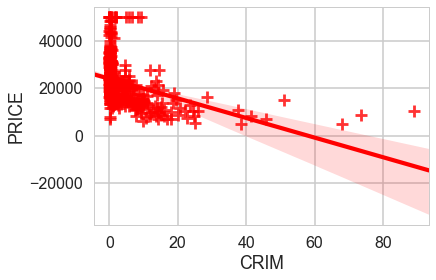

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
for v in ['CRIM']:
    sns.regplot(bos[v],bos.PRICE, marker='+', color='red')
    plt.show()

In [14]:
 CRIM : 

SyntaxError: invalid syntax (<ipython-input-14-48d02fa08900>, line 1)

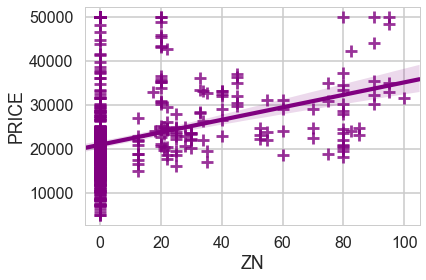

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
for v in ['ZN']:
    sns.regplot(bos[v],bos.PRICE, marker='+', color='purple')
    plt.show()

In [ ]:
ZN : roportion of residential land zoned for lots over 25,000 sq.ft.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for v in ['INDUS']:
    sns.regplot(bos[v],bos.PRICE, marker='+', color='red')
    plt.show()

In [ ]:
INDUS   -  proportion of non-retail business acres per town

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for v in ['CHAS']:
    sns.regplot(bos[v],bos.PRICE, marker='+', color='blue')
    plt.show()

In [ ]:
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for v in ['NOX']:
    sns.regplot(bos[v],bos.PRICE, marker='+', color='blue')
    plt.show()

In [ ]:
NOX      nitric oxides concentration (parts per 10 million)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for v in ['RM']:
    sns.regplot(bos[v],bos.PRICE, marker='+', color='green')
    plt.show()

In [ ]:
RM       average number of rooms per dwelling

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for v in ['AGE']:
    sns.regplot(bos[v],bos.PRICE, marker='+', color='orange')
    plt.show()

In [ ]:
AGE      proportion of owner-occupied units built prior to 1940

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for v in ['DIS']:
    sns.regplot(bos[v],bos.PRICE, marker='+', color='violet')
    plt.show()

In [ ]:
DIS      weighted distances to five Boston employment centres

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for v in ['RAD']:
    sns.regplot(bos[v],bos.PRICE, marker='+', color='indigo')
    plt.show()

In [ ]:
RAD      index of accessibility to radial highways

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for v in ['TAX']:
    sns.regplot(bos[v],bos.PRICE, marker='+', color='yellow')
    plt.show()

In [ ]:
TAX      full-value property-tax rate per $10,000

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for v in ['PTRATIO']:
    sns.regplot(bos[v],bos.PRICE, marker='+', color='blue')
    plt.show()

In [ ]:
PTRATIO  pupil-teacher ratio by town
         

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for v in ['B']:
    sns.regplot(bos[v],bos.PRICE, marker='+', color='blue')
    plt.show()

In [ ]:
 
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for v in ['LSTAT']:
    sns.regplot(bos[v],bos.PRICE, marker='+', color='blue')
    plt.show()

In [ ]:

        - LSTAT    % lower status of the population
        

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for v in ['NOX']:
    sns.regplot(bos[v],bos.PRICE, marker='+', color='blue')
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for v in ['RM']:
    sns.regplot(bos[v],bos.PRICE, marker='+', color='red')
    plt.show()

RM : As seen in the regression plot an increase in "RM" value would lead in increase of MEDV. Houses with more no.of rooms are more spacious and comfortable. So the prices will automatically increase with more facilities.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for v in ['LSTAT']:
    sns.regplot(bos[v],bos.PRICE, marker='+', color='green')
    plt.show()

LSTAT : Its very clear from the above plot that an increase in the value of "LSTAT" will lead to a decrease in the value of MEDV. In a neighbourhood with more no.of lower class poor people, the prices will be less as they can afford relatively cheaper goods, hence the value of MEDV will also be less.

In [ ]:
bos.describe()

### Scatter plots
***

Let's look at some scatter plots for three variables: 'CRIM', 'RM' and 'PTRATIO'. 

What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? 

Text(0.5,1,'Relationship between CRIM and Price')

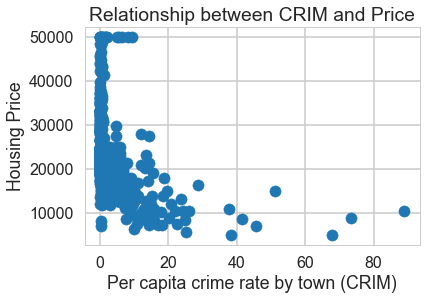

In [23]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

Text(0.5,1,'Relationship between RM and Price')

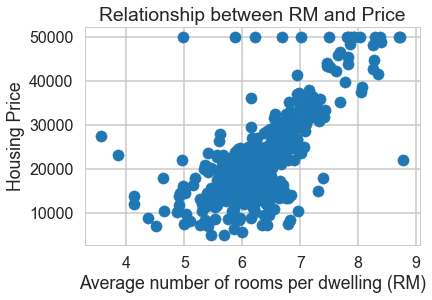

In [24]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

# sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

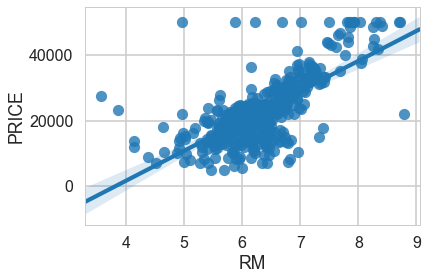

In [25]:
# We can also use seaborn regplot for this
#  This provides automatic linear regression fits (useful for data exploration later on)

sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

In [ ]:
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-to-Teacher Ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

### Histograms
***


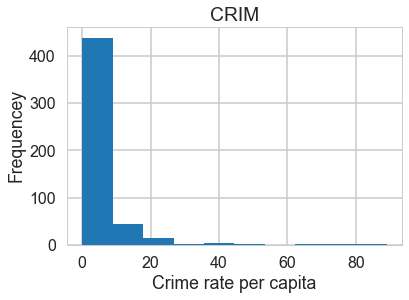

In [26]:
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

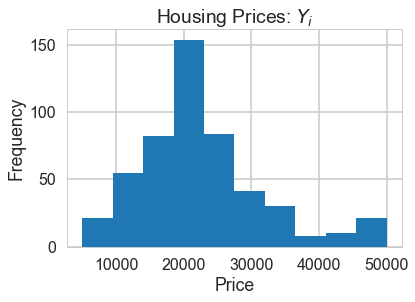

In [27]:
plt.hist(bos.PRICE)
plt.title('Housing Prices: $Y_i$')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Linear regression with  Boston housing data example
***

Here, 

$Y$ = boston housing prices (also called "target" data in python)

and

$X$ = all the other features (or independent variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least squares method as the way to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `sklearn`


In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What can you do with a LinearRegression object? 

In [ ]:
# Look inside linear regression object
# LinearRegression.<tab>

# 1. FITTING THE MODEL / create classifier

# 2. CALCULATE THE SCORE (ACCURACY)

# 3.  MORE OPTIMIZATIONS till we get a reasonable accuracy score

# 4. Predict values

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [ ]:
# Look inside lm object
# lm.<tab>

In [29]:
print(lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [ ]:
X

In [30]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

# your turn
# notice fit_intercept=True and normalize=True
# How would you change the model to not fit an intercept term? 


/Users/rajan/.local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
X

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



print('Estimated intercept coefficient:', lm.intercept_)

In [31]:
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 13


In [35]:
lm.intercept_

36491.103280361596

In [34]:
lm.coef_

array([-1.07170557e+02,  4.63952195e+01,  2.08602395e+01,  2.68856140e+03,
       -1.77957587e+04,  3.80475246e+03,  7.51061703e-01, -1.47575880e+03,
        3.05655038e+02, -1.23293463e+01, -9.53463555e+02,  9.39251272e+00,
       -5.25466633e+02])

### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [ ]:
# first five predicted prices
lm.predict(X)[0:5]

Text(0,0.5,'Frequency')

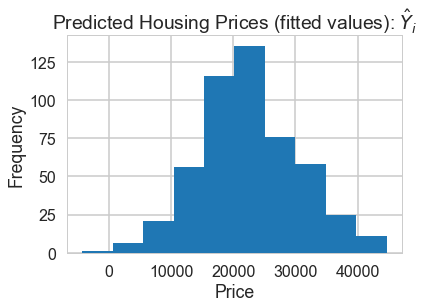

In [36]:
plt.hist(lm.predict(X))
plt.title('Predicted Housing Prices (fitted values): $\hat{Y}_i$')
plt.xlabel('Price')
plt.ylabel('Frequency')

Let's plot the true prices compared to the predicted prices to see they disagree, we saw this exactly befor but this is how you access the predicted values in using `sklearn`.

Text(0.5,1,'Prices vs Predicted Prices: $Y_i$ vs $\\hat{Y}_i$')

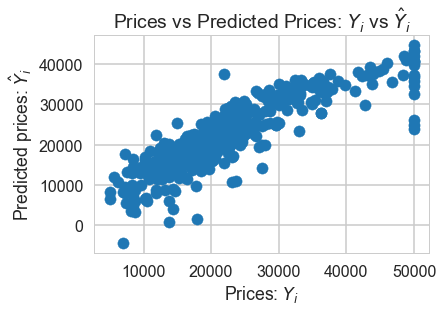

In [37]:
plt.scatter(bos.PRICE, lm.predict(X))
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")

### Residual sum of squares

Let's calculate the residual sum of squares 

$$ S = \sum_{i=1}^N r_i = \sum_{i=1}^N (y_i - (\beta_0 + \beta_1 x_i))^2 $$

In [ ]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

#### Mean squared error

In [ ]:
mseFull = np.mean((bos.PRICE - lm.predict(X)) ** 2)
print(mseFull)

## Relationship between `PTRATIO` and housing price
***

Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town)

Calculate the mean squared error. 


In [ ]:
lm = LinearRegression()
lm.fit(X[['PTRATIO']], bos.PRICE)

In [ ]:
msePTRATIO = np.mean((bos.PRICE - lm.predict(X[['PTRATIO']])) ** 2)
print(msePTRATIO)

We can also plot the fitted linear regression line. 

In [ ]:
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-to-Teacher Ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

plt.plot(bos.PTRATIO, lm.predict(X[['PTRATIO']]), color='blue', linewidth=3)
plt.show()

# Your turn
***

Try fitting a linear regression model using three independent variables

1. 'CRIM' (per capita crime rate by town)
2. 'RM' (average number of rooms per dwelling)
3. 'PTRATIO' (pupil-teacher ratio by town)

Calculate the mean squared error. 

In [ ]:
# your turn


## Other important things to think about when fitting a linear regression model
***
<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. </li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X.  
        <ul>
            <li>e.g. PTRATIO
        </ul>
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. 
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>


# Part 3: Training and Test Data sets

### Purpose of splitting data into Training/testing sets
***
<div class="span5 alert alert-info">

<p> Let's stick to the linear regression example: </p>
<ul>
  <li> We built our model with the requirement that the model fit the data well. </li>
  <li> As a side-effect, the model will fit <b>THIS</b> dataset well. What about new data? </li>
    <ul>
      <li> We wanted the model for predictions, right?</li>
    </ul>
  <li> One simple solution, leave out some data (for <b>testing</b>) and <b>train</b> the model on the rest </li>
  <li> This also leads directly to the idea of cross-validation, next section. </li>  
</ul>
</div>

***

One way of doing this is you can create training and testing data sets manually. 

In [ ]:
X_train = X[:-50]
X_test = X[-50:]
Y_train = bos.PRICE[:-50]
Y_test = bos.PRICE[-50:]
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

Another way, is to split the data into random train and test subsets using the function `train_test_split` in `sklearn.cross_validation`. 

In [ ]:
# let's look at the function in the help file
# sklearn.cross_validation.train_test_split?

In [ ]:
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(
    X, bos.PRICE, test_size=0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

Your turn.  Let's build a linear regression model using our new training data sets. 

In [ ]:
# your turn
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

Now, calculate the mean squared error using just the test data and compare to mean squared from using all the data to fit the model. 

In [ ]:
# your turn
print "Fit a model X_train, and calculate MSE with Y_train:", np.mean((Y_train - lm.predict(X_train)) ** 2)
print "Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((Y_test - lm.predict(X_test)) ** 2)

#### Residual plots

In [ ]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

### K-fold Cross-validation as an extension of this idea
***
<div class="span5 alert alert-info">

<p> A simple extension of the Test/train split is called K-fold cross-validation.  </p>

<p> Here's the procedure:</p>
<ul>
  <li> randomly assign your $n$ samples to one of $K$ groups. They'll each have about $n/k$ samples</li>
  <li> For each group $k$: </li>
    <ul>
      <li> Fit the model (e.g. run regression) on all data excluding the $k^{th}$ group</li>
      <li> Use the model to predict the outcomes in group $k$</li>
      <li> Calculate your prediction error for each observation in $k^{th}$ group (e.g. $(Y_i - \hat{Y}_i)^2$ for regression, $\mathbb{1}(Y_i = \hat{Y}_i)$ for logistic regression). </li>
    </ul>
  <li> Calculate the average prediction error across all samples $Err_{CV} = \frac{1}{n}\sum_{i=1}^n (Y_i - \hat{Y}_i)^2$ </li>
</ul>
</div>

***

Luckily you don't have to do this entire process all by hand (``for`` loops, etc.) every single time, ``sci-kit learn`` has a very nice implementation of this, have a look at the [documentation](http://scikit-learn.org/stable/modules/cross_validation.html).